In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("weather.csv")
df

,date,city,tempreature,windspeed,event
0,1/2/2017,lahore,32.0,16.0,sunny
1,3/2/2017,karachi,NaN,32.0,wet smokey
2,5/2/2017,lahore,40.0,NaN,No Event
3,7/2/2017,peshawer,32.0,4.0,NaN
4,8/2/2017,lahore,33.0,NaN,cloudey
5,9/2/2017,karachi,35.0,6.0,NaN
6,11/2/2017,peshawer,NaN,46.0,No Event
7,13/2/2017,lahore,29.0,NaN,rain
8,15/2/2017,karachi,NaN,75.0,NaN
9,18/2/2017,karachi,40.0,NaN,cloudey


In [3]:
g = df.groupby('city')
g

In [5]:
for city , city_df in g:
    print(city)
    print(city_df)

karachi
        date     city  tempreature  windspeed       event
1   3/2/2017  karachi          NaN       32.0  wet smokey
5   9/2/2017  karachi         35.0        6.0         NaN
8  15/2/2017  karachi          NaN       75.0         NaN
9  18/2/2017  karachi         40.0        NaN     cloudey
lahore
        date    city  tempreature  windspeed     event
0   1/2/2017  lahore         32.0       16.0     sunny
2   5/2/2017  lahore         40.0        NaN  No Event
4   8/2/2017  lahore         33.0        NaN   cloudey
7  13/2/2017  lahore         29.0        NaN      rain
peshawer
        date      city  tempreature  windspeed     event
3   7/2/2017  peshawer         32.0        4.0       NaN
6  11/2/2017  peshawer          NaN       46.0  No Event


In [6]:
g.get_group("karachi")

,date,city,tempreature,windspeed,event
1,3/2/2017,karachi,NaN,32.0,wet smokey
5,9/2/2017,karachi,35.0,6.0,NaN
8,15/2/2017,karachi,NaN,75.0,NaN
9,18/2/2017,karachi,40.0,NaN,cloudey


In [7]:
g.max()

,date,tempreature,windspeed
city,,,
karachi,9/2/2017,40.0,75.0
lahore,8/2/2017,40.0,16.0
peshawer,7/2/2017,32.0,46.0


In [8]:
g.mean()

,tempreature,windspeed
city,,
karachi,37.5,37.666667
lahore,33.5,16.000000
peshawer,32.0,25.000000


In [9]:
g.describe()

tempreature                                                  \
               count  mean       std   min    25%   50%    75%   max   
city                                                                   
karachi          2.0  37.5  3.535534  35.0  36.25  37.5  38.75  40.0   
lahore           4.0  33.5  4.654747  29.0  31.25  32.5  34.75  40.0   
peshawer         1.0  32.0       NaN  32.0  32.00  32.0  32.00  32.0   

         windspeed                                                      
             count       mean        std   min   25%   50%   75%   max  
city                                                                    
karachi        3.0  37.666667  34.847286   6.0  19.0  32.0  53.5  75.0  
lahore         1.0  16.000000        NaN  16.0  16.0  16.0  16.0  16.0  
peshawer       2.0  25.000000  29.698485   4.0  14.5  25.0  35.5  46.0

city
karachi     AxesSubplot(0.125,0.125;0.775x0.755)
lahore      AxesSubplot(0.125,0.125;0.775x0.755)
peshawer    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

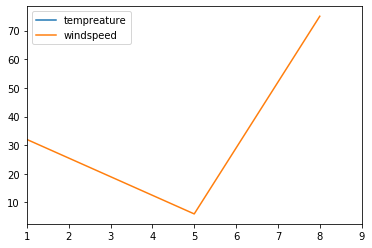

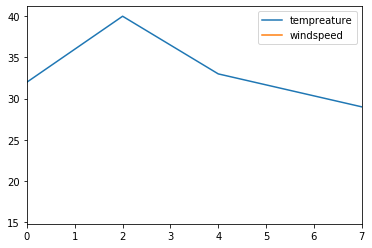

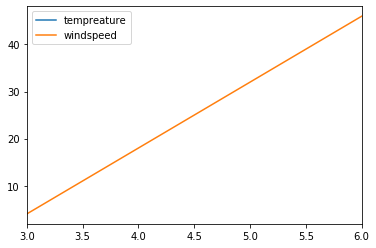

In [10]:
%matplotlib inline
g.plot()

In [13]:
pakistan_weather = pd.DataFrame({
    
    "city": ["lahore","peshawer","karachi"],
    "tempreature": [23,21,30],
    "humidity": [40,21,80]
})
pakistan_weather

,city,tempreature,humidity
0,lahore,23,40
1,peshawer,21,21
2,karachi,30,80


In [14]:
us_weather = pd.DataFrame({
    
    "city": ["new york","chicago","orlando"],
    "tempreature": [23,13,30],
    "humidity": [40,61,80]
})
us_weather

,city,tempreature,humidity
0,new york,23,40
1,chicago,13,61
2,orlando,30,80


In [15]:
df = pd.concat([pakistan_weather , us_weather])
df

,city,tempreature,humidity
0,lahore,23,40
1,peshawer,21,21
2,karachi,30,80
0,new york,23,40
1,chicago,13,61
2,orlando,30,80


In [16]:
df = pd.concat([pakistan_weather , us_weather] , ignore_index = True)
df

,city,tempreature,humidity
0,lahore,23,40
1,peshawer,21,21
2,karachi,30,80
3,new york,23,40
4,chicago,13,61
5,orlando,30,80


In [18]:
df = pd.concat([pakistan_weather , us_weather] , keys = ["Pakistan" , "us"])
df

city  tempreature  humidity
Pakistan 0    lahore           23        40
         1  peshawer           21        21
         2   karachi           30        80
us       0  new york           23        40
         1   chicago           13        61
         2   orlando           30        80

In [20]:
df.loc["Pakistan"]

,city,tempreature,humidity
0,lahore,23,40
1,peshawer,21,21
2,karachi,30,80


In [28]:
temp_df = pd.DataFrame({
    "city": ["lahore","peshawer","karachi"],
    "tempreature": [23,21,30]
},index = [0 , 1 ,2])

In [31]:
wind_speed = pd.DataFrame({
    "city": ["peshawer","lahore"],
    "windspeed": [32,45]
} , index = [1 , 0])

In [32]:
df = pd.concat([temp_df , wind_speed] , axis = 1)
df

,city,tempreature,city,windspeed
0,lahore,23,lahore,45.0
1,peshawer,21,peshawer,32.0
2,karachi,30,NaN,NaN


In [35]:
s = pd.Series(["humid", "Rain","Dry"], name ="event")
s

0    humid
1     Rain
2      Dry
Name: event, dtype: object

In [36]:
df = pd.concat([temp_df , s] , axis = 1)
df

,city,tempreature,event
0,lahore,23,humid
1,peshawer,21,Rain
2,karachi,30,Dry
